Summary: Want a graph that shows how likely you will recieve a call based off od Day of week (Dow) and hour.

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#time_stamp: a time format string like this
def csv2hour(time_stamp):
    time1 = time_stamp
    if time1 == "":
        return -1
    [ymd,hmm] = time1.split()
    [y,m,d] = ymd.split('-')
    [h,minu,sec] = hmm.split(":")
    y = int(y)
    m = int(m)
    d = int(d)
    h = int(h)
#     minu = int(minu)
#     sec = math.floor(float(sec))
#     timearrive = datetime(y, m, d, h, minu, sec)
    return h

In [139]:
test_data = (np.genfromtxt("backend_calls.csv", delimiter=","))
test_data_s = (np.genfromtxt("backend_calls.csv", delimiter=",", dtype = str))
clean_data = (np.genfromtxt("cleaned_data.csv", delimiter=","))
clean_data_s = (np.genfromtxt("cleaned_data.csv", delimiter=",", dtype = str))
ausint_inc_s = (np.genfromtxt("austin_incidents.csv", delimiter=",", dtype = str))

In [14]:
print(len(test_data))
print(len(clean_data))

30197
210108


'hour'

In [92]:
clean_data_s[0]

array(['', 'IncidentForeignKey', 'Radio_Name', 'Longitude_At_Assign_Time',
       'Latitude_At_Assign_Time', 'Time_Assigned', 'Time_Enroute',
       'Time_ArrivedAtScene', 'Time_Depart_Scene',
       'Time_Arrive_Destination', 'Time_Available', 'Time_Call_Cleared',
       'Call_Disposition', 'Longitude_Of_Emergency',
       'Latitude_Of_Emergency', 'transport_time', 'grid_time'],
      dtype='<U30')

In [84]:
dow_dict = {
    'Mon': 0,
    'Tue': 1,
    'Wed': 2,
    'Thu': 3,
    'Fri': 4,
    'Sat': 5,
    'Sun': 6   
}

hour_dict = {
    0: 0, 
    1: 1, 
    2: 2, 
    3: 3, 
    4: 4, 
    5: 5, 
    6: 6, 
    7: 7, 
    8: 8, 
    9: 9, 
    10: 10, 
    11: 11, 
    12: 12, 
    13: 13, 
    14: 14, 
    15: 15, 
    16: 16, 
    17: 17, 
    18: 18, 
    19: 19, 
    20: 20, 
    21: 21, 
    22: 22, 
    23: 23, 
}

In [144]:
len(ausint_inc_s)

210108

In [150]:
austin_temp_anal = np.zeros([7,24])
for i in range(2,len(ausint_inc_s)): #len(ausint_inc_s)):
#     if test_data[i,23] == 'nan':
#         continue
    #collect the dow and match it to the dictionary
    ind_dow = dow_dict[ausint_inc_s[i][3]] 
    #collect the hour and match it to the dictionary
    h = int(ausint_inc_s[i][-6])
    ind_hour = hour_dict[h] 
    #add to frequency
    #print(str(ind_dow) + " " + str(ind_hour))
    austin_temp_anal[ind_dow, ind_hour] = austin_temp_anal[ind_dow, ind_hour] + 1

In [ ]:
# temp_data = np.zeros([7,24])
# for i in range(2,len(test_data)):
#     if test_data[i,23] == 'nan':
#         continue
#     #collect the dow and match it to the dictionary
#     ind_dow = dow_dict[test_data_s[i,23]] 
#     #collect the hour and match it to the dictionary
#     h = csv2hour(test_data_s[i][6]) 
#     ind_hour = hour_dict[h] 
#     #add to frequency
#     #print(str(ind_dow) + " " + str(ind_hour))
#     temp_data[ind_dow, ind_hour] = temp_data[ind_dow, ind_hour] + 1

In [105]:
# import numpy as np; np.random.seed(0)
# import seaborn as sns; sns.set_theme()
# uniform_data = np.random.rand(7, 14)
# ax = sns.heatmap(uniform_data,linewidths=.5, square = True)

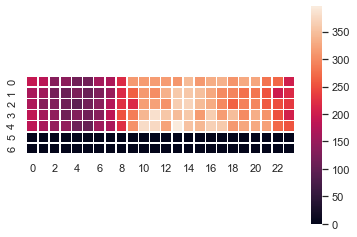

In [90]:
ax = sns.heatmap(temp_data,linewidths=.5, square = True)

Text(30.5, 0.5, 'DoW')

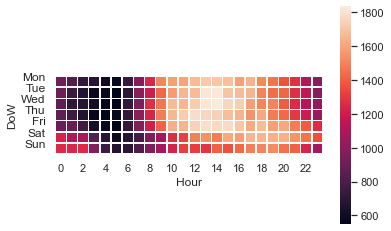

In [151]:
ax = sns.heatmap(austin_temp_anal,linewidths=.5, square = True)

#x = np.arange(2,10,2)
y_ticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
# Set number of ticks for x-axis
ax.set_yticks(np.arange(0,7,1))
# Set ticks labels for x-axis
ax.set_yticklabels(y_ticks_labels, rotation='horizontal', fontsize=12)
plt.xlabel ('Hour')
plt.ylabel ('DoW')
